<a href="https://colab.research.google.com/github/kazimovmirkazim/Computer-Vision/blob/main/Fruit_and_vegetable_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!curl -L -o fruit-and-vegetable-image-recognition.zip https://www.kaggle.com/api/v1/datasets/download/kritikseth/fruit-and-vegetable-image-recognition

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2032M  100 2032M    0     0  29.3M      0  0:01:09  0:01:09 --:--:-- 30.5M


In [ ]:
!unzip '/content/fruit-and-vegetable-image-recognition.zip'

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator (rescale= 1./255)


train_dir='/content/train'
test_dir='/content/test'
valid_dir='/content/validation'


In [9]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size= 32,
    target_size= (224,224),
    class_mode='categorical',
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    batch_size= 32,
    target_size=(224,224),
    class_mode='categorical',
    seed=42
)

model_1 = tf.keras.Sequential (
    [
        tf.keras.layers.Conv2D( filters=10,
                               kernel_size= 3,
                                activation='relu',
                                input_shape =(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding='valid'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(36,activation='softmax') # Changed to 36 neurons and softmax activation for 36 classes
    ]
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [14]:
history= model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data= valid_data,
    validation_steps=len(valid_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 3/98 ━━━━━━━━━━━━━━━━━━━━ 3:34 2s/step - accuracy: 0.0087 - loss: 3.6544

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.0627 - loss: 3.4337 - val_accuracy: 0.4046 - val_loss: 2.3861
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.3541 - loss: 2.3454 - val_accuracy: 0.8889 - val_loss: 0.6991
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.8479 - loss: 0.6782 - val_accuracy: 0.9516 - val_loss: 0.4232
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.9780 - loss: 0.1591 - val_accuracy: 0.9516 - val_loss: 0.4525
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.9881 - loss: 0.0962 - val_accuracy: 0.9601 - val_loss: 0.3133


In [15]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │     1,011,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,042,860 (11.61 MB)

 Trainable params: 1,014,286 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,028,574 (7.74 MB)

In [25]:
import os
for dirpath,dirnames,filenames in  os.walk('content'):
  print(f'There are {len(dirnames)} directories and  {len(filenames)} images in {dirpath}.')

In [26]:
os.listdir('/content/train')

['kiwi',
 'sweetcorn',
 'corn',
 'mango',
 'eggplant',
 'jalepeno',
 'garlic',
 'cabbage',
 'onion',
 'tomato',
 'soy beans',
 'lemon',
 'paprika',
 'sweetpotato',
 'pineapple',
 'beetroot',
 'cucumber',
 'orange',
 'watermelon',
 'cauliflower',
 'carrot',
 'raddish',
 'grapes',
 'ginger',
 'apple',
 'turnip',
 'capsicum',
 'lettuce',
 'spinach',
 'pomegranate',
 'chilli pepper',
 'potato',
 'banana',
 'bell pepper',
 'peas',
 'pear']

In [19]:
import pathlib
import numpy as np
data_dir = pathlib.Path('/content/train')
data_dir

PosixPath('/content/train')

In [27]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
  target_folder = os.path.join(target_dir, target_class) # Use os.path.join for correct path creation
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(os.path.join(target_folder, random_image[0])) # Use os.path.join for correct path creation
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (565, 850, 3)


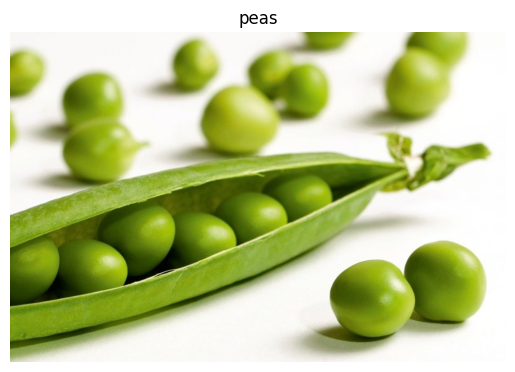

In [43]:
img= view_random_image(target_dir='/content/train',
                       target_class='peas')